# Numeric features scaling

## Preparation of data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model

In [2]:
%matplotlib inline
# If you are using IPython, this will make the images available in the notebook

In [3]:
np.set_printoptions(precision=5, suppress=True) # sets float output to 5 decimals

In [4]:
boston = load_boston() 
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.ix[:,:-1]
y = dataset['target'].values

In [5]:
yq = np.array(y>25, dtype=int)

## Numeric features scaling 

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
linear_regression.fit(X,y)
print ("coefficients: %s\nintercept: %0.3f" % (linear_regression.coef_,linear_regression.intercept_))

coefficients: [ -0.10717   0.0464    0.02086   2.68856 -17.79576   3.80475   0.00075
  -1.47576   0.30566  -0.01233  -0.95346   0.00939  -0.52547]
intercept: 36.491


In [7]:
dataset.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
target       5.00000
dtype: float64

### Mean Centering

In [8]:
centering = StandardScaler(with_mean=True, with_std=False)
linear_regression.fit(centering.fit_transform(X),y)
print ("coefficients: %s\nintercept: %0.3f" % (linear_regression.coef_,linear_regression.intercept_))

coefficients: [ -0.10717   0.0464    0.02086   2.68856 -17.79576   3.80475   0.00075
  -1.47576   0.30566  -0.01233  -0.95346   0.00939  -0.52547]
intercept: 22.533


In [9]:
print ('mean: %0.3f' % np.mean(y))

mean: 22.533


### Standardization

In [10]:
standardization = StandardScaler(with_mean=True, with_std=True)
linear_regression.fit(standardization.fit_transform(X),y)
print ("coefficients: %s\nintercept: %0.3f" % (linear_regression.coef_,linear_regression.intercept_))

coefficients: [-0.92041  1.08098  0.14297  0.6822  -2.06009  2.67064  0.02112 -3.10445
  2.65879 -2.0759  -2.06216  0.85664 -3.74868]
intercept: 22.533


### Normalization

In [11]:
scaling  = MinMaxScaler(feature_range=(0, 1))
linear_regression.fit(scaling.fit_transform(X),y)
print ("coefficients: %s\nintercept: %0.3f" % (linear_regression.coef_,linear_regression.intercept_))

coefficients: [ -9.53495   4.63952   0.56907   2.68856  -8.64874  19.857     0.07293
 -16.22877   7.03007  -6.46058  -8.96256   3.72488 -19.04291]
intercept: 26.613


### The logistic regression case

In [12]:
import statsmodels.api as sm
Xq = sm.add_constant(standardization.fit_transform(X))
logit = sm.Logit(yq, Xq)
result = logit.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.206632
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  506
Model:                          Logit   Df Residuals:                      492
Method:                           MLE   Df Model:                           13
Date:                Mon, 21 Dec 2015   Pseudo R-squ.:                  0.6289
Time:                        22:29:09   Log-Likelihood:                -104.56
converged:                       True   LL-Null:                       -281.76
                                        LLR p-value:                 9.147e-68
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -3.0541      0.356     -8.572      0.000        -3.752    -2.356
x1            -0.0949      0.

In [13]:
print ('odd ratios of coefficients: %s' % np.exp(result.params))

odd ratios of coefficients: [  0.04717   0.90948   1.2896    0.46908   1.2779    0.45277   3.75996
   1.10314   0.28966  15.9012    0.16158   0.46602   0.81363   0.07275]


In [14]:
def sigmoid(p):
  return 1 / (1 + np.exp(-p))

print ('intercept: %0.3f' % result.params[0])
print ('probability of value above 25 when all predictors are average: %0.3f' % sigmoid(result.params[0]))

intercept: -3.054
probability of value above 25 when all predictors are average: 0.045


In [15]:
print ('average likelihood of positive response: %0.3f' % (sum(yq) / float(len(yq))))

average likelihood of positive response: 0.245


In [16]:
C = np.ones(len(X))
logit = sm.Logit(yq, C)
result = logit.fit()
print (result.summary())
print ('\nprobability of value above 25 using just a constant: %0.3f' % sigmoid(result.params[0]))

Optimization terminated successfully.
         Current function value: 0.556842
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  506
Model:                          Logit   Df Residuals:                      505
Method:                           MLE   Df Model:                            0
Date:                Mon, 21 Dec 2015   Pseudo R-squ.:                   0.000
Time:                        22:29:09   Log-Likelihood:                -281.76
converged:                       True   LL-Null:                       -281.76
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.1251      0.103    -10.886      0.000        -1.328    -0.923

probability of value above 2

# Qualitative features encoding

In [17]:
outlook     = ['sunny', 'overcast', 'rainy']
temperature = ['hot', 'mild', 'cool']
humidity    = ['high', 'normal']
windy       = ['TRUE', 'FALSE']

weather_dataset = list()

for o in outlook:
    for t in temperature:
        for h in humidity:
            for w in windy:
                weather_dataset.append([o,t,h,w])

play = [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]

## Dummy coding

In [18]:
import pandas as pd
df = pd.DataFrame(weather_dataset, columns=['outlook', 'temperature', 'humidity', 'windy'])

In [19]:
print (pd.get_dummies(df.humidity).ix[:5,:])

   high  normal
0     1       0
1     1       0
2     0       1
3     0       1
4     1       0
5     1       0


In [20]:
dummy_encoding = pd.get_dummies(df)

In [21]:
import statsmodels.api as sm
X = sm.add_constant(dummy_encoding)
logit = sm.Logit(play, X)
result = logit.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.292346
         Iterations 32
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   36
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            6
Date:                Mon, 21 Dec 2015   Pseudo R-squ.:                  0.5744
Time:                        22:29:10   Log-Likelihood:                -10.524
converged:                       True   LL-Null:                       -24.731
                                        LLR p-value:                 7.856e-05
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                0.2393   1.76e+07   1.36e-08      1.000     -3.44e+07  3.44e+07
outlook_ov

In [22]:
X.drop(['outlook_sunny', 'temperature_mild', 'humidity_normal', 'windy_FALSE'], inplace=True, axis=1)
logit = sm.Logit(play, X)
result = logit.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.292346
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   36
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            6
Date:                Mon, 21 Dec 2015   Pseudo R-squ.:                  0.5744
Time:                        22:29:11   Log-Likelihood:                -10.524
converged:                       True   LL-Null:                       -24.731
                                        LLR p-value:                 7.856e-05
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                5.4055      2.196      2.462      0.014         1.102     9.709
outlook_ove

## One-hot encoding

In [23]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = False)
dict_representation = [{varname:var for var, varname in zip(row,['outlook', 'temperature', 'humidity', 'windy'])} for row in weather_dataset]
print (dict_representation[0])
print (vectorizer.fit_transform(dict_representation))

{'humidity': 'high', 'temperature': 'hot', 'windy': 'TRUE', 'outlook': 'sunny'}
[[ 1.  0.  0.  0.  1.  0.  1.  0.  0.  1.]
 [ 1.  0.  0.  0.  1.  0.  1.  0.  1.  0.]
 [ 0.  1.  0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.  1.  0.  1.  0.]
 [ 1.  0.  0.  0.  1.  0.  0.  1.  0.  1.]
 [ 1.  0.  0.  0.  1.  0.  0.  1.  1.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  1.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.  0.  1.  1.  0.]
 [ 1.  0.  0.  0.  1.  1.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  1.  1.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  1.  1.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  1.  0.  0.  1.  0.]
 [ 1.  0.  1.  0.  0.  0.  1.  0.  0.  1.]
 [ 1.  0.  1.  0.  0.  0.  1.  0.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0.  0.  1.  0.  1.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  1.  0.  1.]
 [ 1.  0.  1.  0.  0.  0.  0.  1.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  1.  1.  0.]
 [ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  0.  1.  0.

In [24]:
print (vectorizer.feature_names_)

['humidity=high', 'humidity=normal', 'outlook=overcast', 'outlook=rainy', 'outlook=sunny', 'temperature=cool', 'temperature=hot', 'temperature=mild', 'windy=FALSE', 'windy=TRUE']


In [25]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
label_encoder = LabelEncoder()
print (label_encoder.fit_transform(df.outlook))

[2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [26]:
label_encoder.inverse_transform([0,1,2])

array(['overcast', 'rainy', 'sunny'], dtype=object)

In [27]:
print (label_encoder.classes_)

['overcast' 'rainy' 'sunny']


In [28]:
label_binarizer = LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
print (label_binarizer.fit_transform(label_encoder.fit_transform(df.outlook)))

[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]


## Feature Hasher

In [29]:
your_text = 'Nomina sunt consequentia rerum'
mapping_words_in_text = {word:position for position, word in enumerate(set(your_text.lower().split(' ')))}
print (mapping_words_in_text)

{'sunt': 0, 'nomina': 1, 'rerum': 2, 'consequentia': 3}


In [30]:
corpus = ['The quick fox jumped over the lazy dog', 'I sought a dog wondering around with a bird', 'My dog is named Fido']

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
textual_one_hot_encoder = CountVectorizer(binary=True)
textual_one_hot_encoder.fit(corpus)
vectorized_text = textual_one_hot_encoder.transform(corpus)
print(vectorized_text.todense())

[[0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0]]


In [32]:
print (textual_one_hot_encoder.get_feature_names())

['around', 'bird', 'dog', 'fido', 'fox', 'is', 'jumped', 'lazy', 'my', 'named', 'over', 'quick', 'sought', 'the', 'with', 'wondering']


In [33]:
print (textual_one_hot_encoder.transform(['John went home today']).todense())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [34]:
from sklearn.feature_extraction.text import HashingVectorizer
hashing_trick = HashingVectorizer(n_features=11, binary=True, norm=None, non_negative=True)
M = hashing_trick.transform(corpus)
print (M.todense())

[[ 1.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  1.  0.  1.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.]]


In [35]:
print (hashing_trick.transform(['John went home today']).todense())

[[ 1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


# Numeric features transformation

In [36]:
boston = load_boston() 
labels = boston.feature_names
X = boston.data
y = boston.target
obs = len(y)
print ("Observations: %i" % obs)
print (boston.feature_names)

Observations: 506
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [37]:
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
linear_regression.fit(X, y)
print ('intercept : %s' % linear_regression.coef_)
print ('intercept : %0.3f' % linear_regression.intercept_)

intercept : [ -0.10717   0.0464    0.02086   2.68856 -17.79576   3.80475   0.00075
  -1.47576   0.30566  -0.01233  -0.95346   0.00939  -0.52547]
intercept : 36.491


In [38]:
from sklearn.metrics import r2_score
print ("R-squared: %0.3f" % r2_score(y, linear_regression.predict(X)))

R-squared: 0.741


## Observing residuals

In [39]:
residuals = y - linear_regression.predict(X)
print ("Head of residual %s" % residuals[:5])
print ("Mean of residuals: %0.3f" % np.mean(residuals))
print ("Standard deviation of residuals: %0.3f" % np.std(residuals))

Head of residual [-6.00821 -3.42986  4.12977  4.79186  8.25712]
Mean of residuals: 0.000
Standard deviation of residuals: 4.680


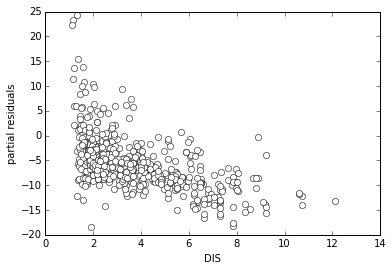

In [40]:
var = 7 # the variable in position 7 is DIS
partial_residual = residuals + X[:,var] * linear_regression.coef_[var]
scatter = plt.plot(X[:,var], partial_residual, 'wo')
l = plt.xlabel(boston.feature_names[var])
l = plt.ylabel('partial residuals')

R-squared: 0.769


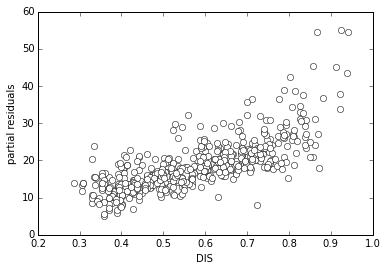

In [41]:
X_t = X.copy()
X_t[:,var] = 1./np.sqrt(X_t[:,var])
linear_regression.fit(X_t, y)
partial_residual = residuals + X_t[:,var] * linear_regression.coef_[var]
scatter = plt.plot(X_t[:,var], partial_residual, 'wo')
l = plt.xlabel(boston.feature_names[var])
l = plt.ylabel('partial residuals')
print ("R-squared: %0.3f" % r2_score(y, linear_regression.predict(X_t)))

## Binning

In [42]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
LB = LabelBinarizer()
X_t = X.copy()
edges = np.histogram(X_t[:,var], bins=20)[1]
binning = np.digitize(X_t[:,var], edges)
X_t = np.column_stack((np.delete(X_t, var, axis=1),LB.fit_transform(binning)))
linear_regression.fit(X_t, y)
print ("R-squared: %0.3f" % r2_score(y, linear_regression.predict(X_t)))

R-squared: 0.768


# Missing data

In [43]:
example = np.array([1,2,np.nan,4,5])
print (example)

[  1.   2.  nan   4.   5.]


In [44]:
print (np.isnan(example))

[False False  True False False]


In [45]:
print (np.nan_to_num(example))

[ 1.  2.  0.  4.  5.]


In [46]:
missing = np.isnan(example)
replacing_value = np.mean(example[~missing])
example[missing] = replacing_value
print (example)

[ 1.  2.  3.  4.  5.]


## Missing data imputation

In [47]:
from random import sample, seed
import numpy as np
seed(19)
Xm = X.copy()
missing = sample(range(len(y)), len(y)//4)
Xm[missing,5] = np.nan
print ("Header of Xm[:,5] : %s" % Xm[:10,5])

Header of Xm[:,5] : [ 6.575    nan  7.185    nan  7.147  6.43   6.012  6.172    nan  6.004]


In [48]:
from sklearn.preprocessing import Imputer
impute = Imputer(missing_values = 'NaN', strategy='mean', axis=1)
print ("Header of imputed Xm[:,5] : %s" % impute.fit_transform(Xm[:,5])[0][:10])

Header of imputed Xm[:,5] : [ 6.575    6.25446  7.185    6.25446  7.147    6.43     6.012    6.172
  6.25446  6.004  ]


## Keeping trace of missing values

In [49]:
missing_indicator = np.isnan(Xm[:,5]).astype(int)
print ("Header of missing indicator : %s" % missing_indicator[:10])

Header of missing indicator : [0 1 0 1 0 0 0 0 1 0]


# Outliers

In [50]:
boston = load_boston() 
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
labels = boston.feature_names
X = dataset
y = boston.target

## Outliers on the response

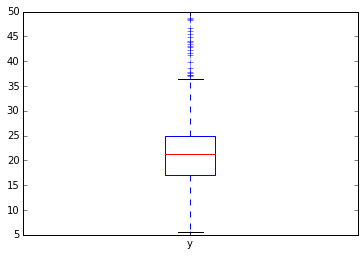

In [51]:
boxplot = plt.boxplot(y,labels=('y'))

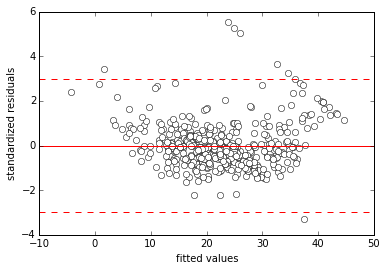

In [52]:
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
linear_regression.fit(X, y)

SSE = linear_regression.residues_
RMSE = np.sqrt(linear_regression.residues_ / (X.shape[0] - X.shape[1] -1))
standardized_residuals = (y - linear_regression.predict(X)) / RMSE

scatter = plt.plot(linear_regression.predict(X), standardized_residuals, 'wo')
plt.plot([-10,50],[0,0], "r-")
plt.plot([-10,50],[3,3], "r--")
plt.plot([-10,50],[-3,-3], "r--")
plt.xlabel('fitted values')
plt.ylabel('standardized residuals')
plt.show()

## Outliers among the predictors

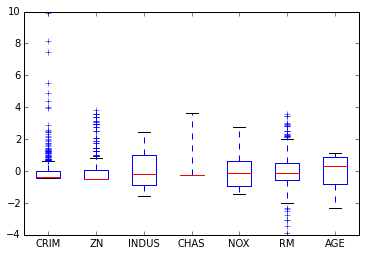

In [53]:
standardization = StandardScaler(with_mean=True, with_std=True)
Xs = standardization.fit_transform(X)
boxplot = plt.boxplot(Xs[:,0:7],labels=labels[0:7])

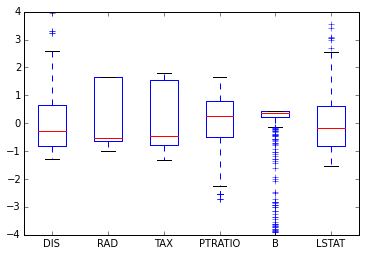

In [54]:
boxplot = plt.boxplot(Xs[:,7:13],labels=labels[7:13])

In [55]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(Xs)
C = pca.transform(Xs)
print (pca.explained_variance_ratio_)

[ 0.47097  0.11016  0.09547  0.06598  0.0642   0.05074  0.04146  0.0305
  0.02134  0.01694  0.01432  0.01301  0.00489]


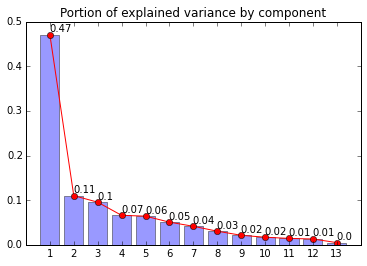

In [56]:
import numpy as np
import matplotlib.pyplot as plt
explained_variance = pca.explained_variance_ratio_
plt.title('Portion of explained variance by component')
range_ = [r+1 for r in range(len(explained_variance))]
plt.bar(range_,explained_variance, color="b", alpha=0.4, align="center")
plt.plot(range_,explained_variance,'ro-')
for pos, pct in enumerate(explained_variance):
    plt.annotate(str(round(pct,2)), (pos+1,pct+0.007))
plt.xticks(range_)
plt.show()

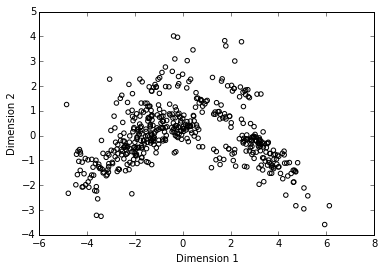

In [57]:
scatter = plt.scatter(C[:,0],C[:,1], facecolors='none', edgecolors='black')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

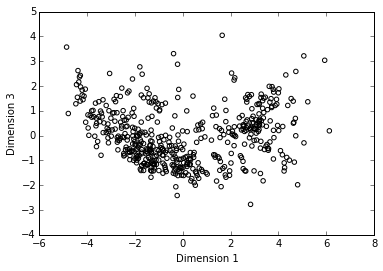

In [58]:
scatter = plt.scatter(C[:,0],C[:,2], facecolors='none', edgecolors='black')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 3')